In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.\

Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)\
Plot bar charts showing impact of employee salaries on retention\
Plot bar charts showing corelation between department and employee retention\
Now build logistic regression model using variables that were narrowed down in step 1\
Measure the accuracy of the model

# Import data

In [101]:
path = 'C:/Users/84393/OneDrive - CÔNG TY TNHH OFFICIENCE/PYTHON/Logistic_Regression/'
df = pd.read_csv(path + 'HR_comma_sep.csv')

print(df.shape)
df.describe(include='all')

(14999, 10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


In [102]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [103]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col} , values = {df[col].unique()}")
    

Department , values = ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
salary , values = ['low' 'medium' 'high']


In [104]:
df['salary'] = df['salary'].replace({'low': 1, 'medium': 2, 'high':3} )

In [105]:
num_col = []
obj_col = []
for col in df.columns:
    if df[col].dtype != 'object':
        num_col.append(col)
    else:
        obj_col.append(col)
print(num_col)
print(obj_col)

['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']
['Department', 'salary']


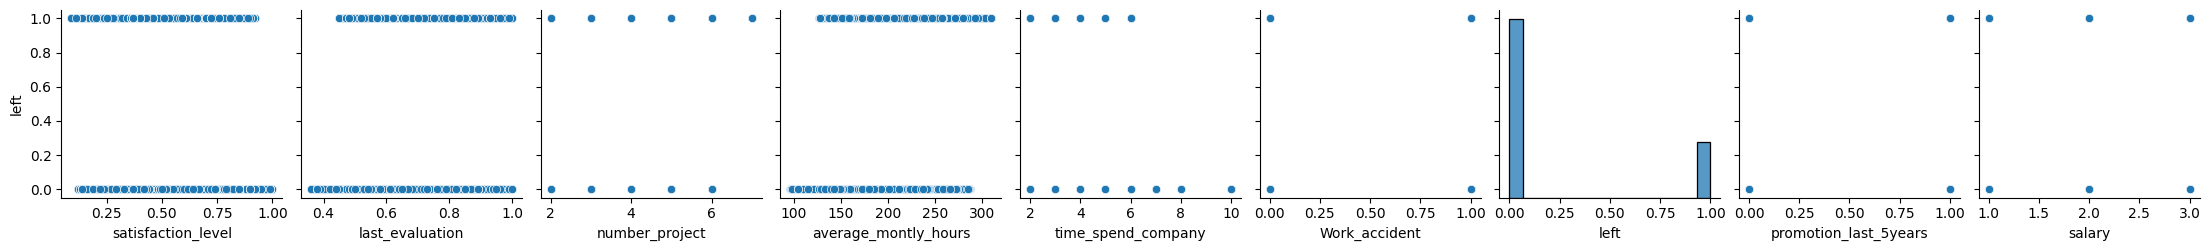

In [7]:
sns.pairplot(df, y_vars = 'left')

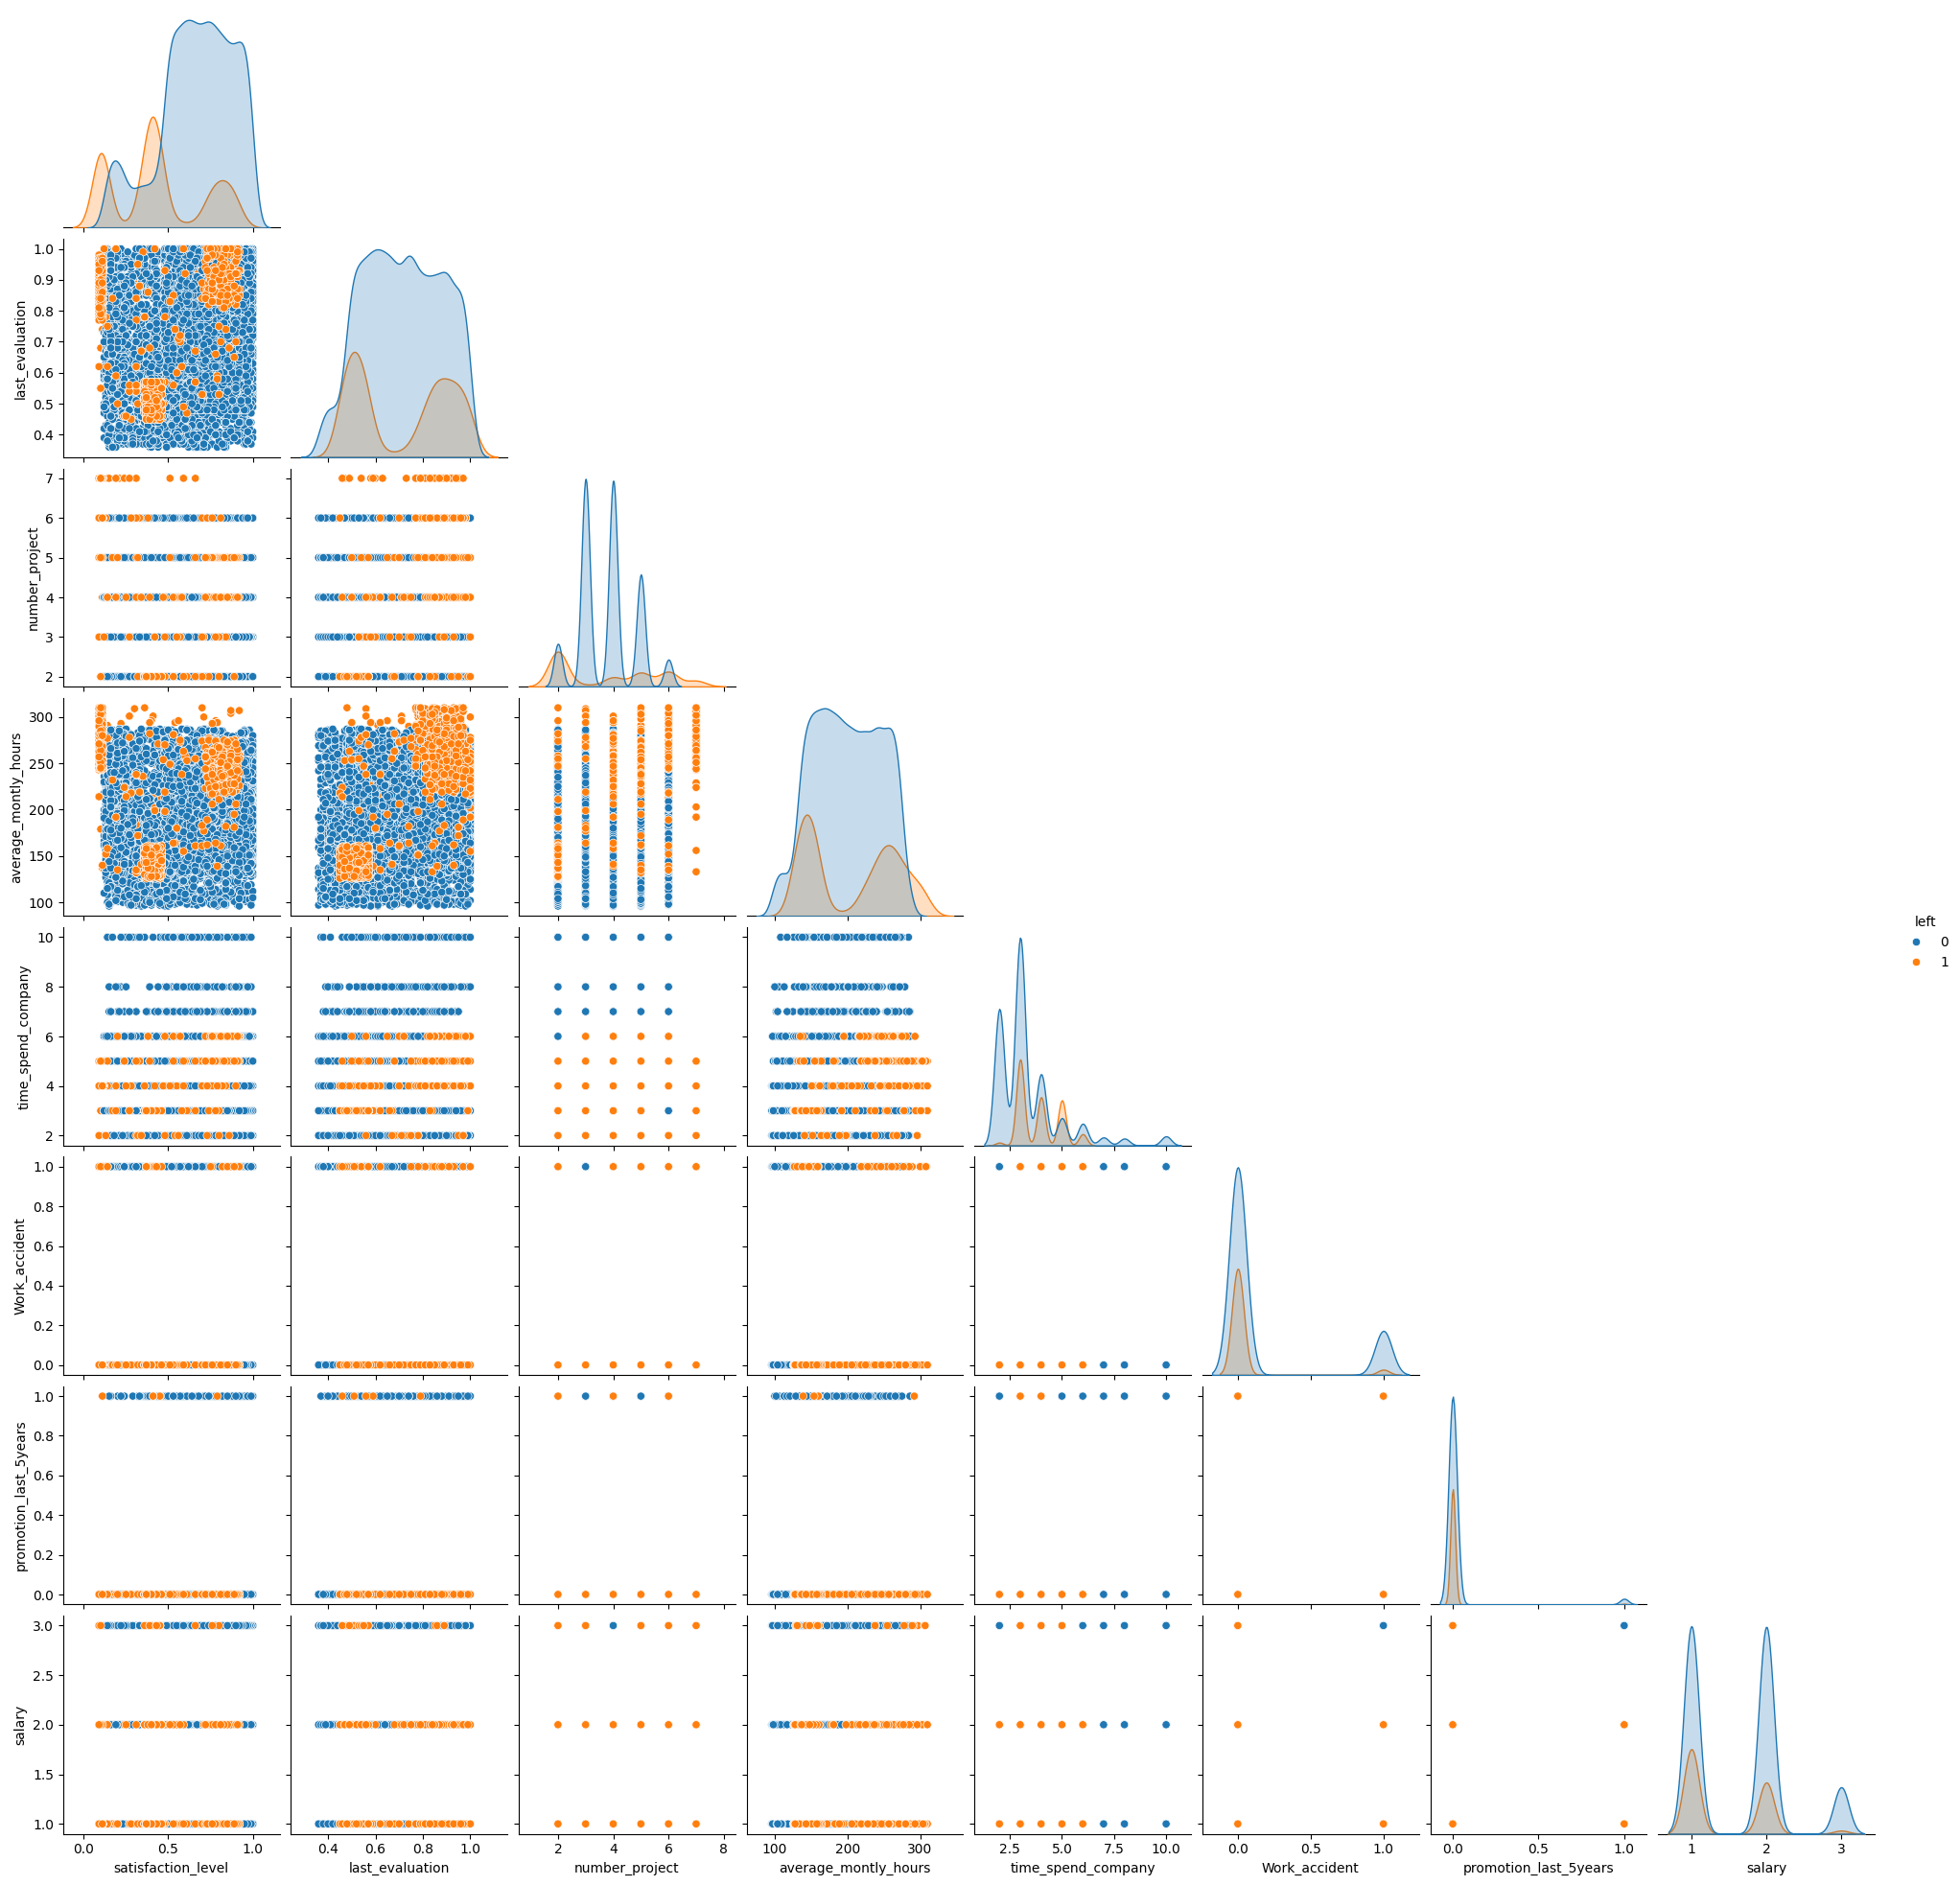

In [8]:
sns.pairplot(df, hue='left', corner=True)

high impact: satisfaction_level, last_evalation, salary, number_project, time_spend_company, average_monthly_hour, work_accident, department\

In [19]:
import math 
ncols = math.ceil(len(df.columns) / 2)
nrows = 2

print(ncols, nrows)


5 2


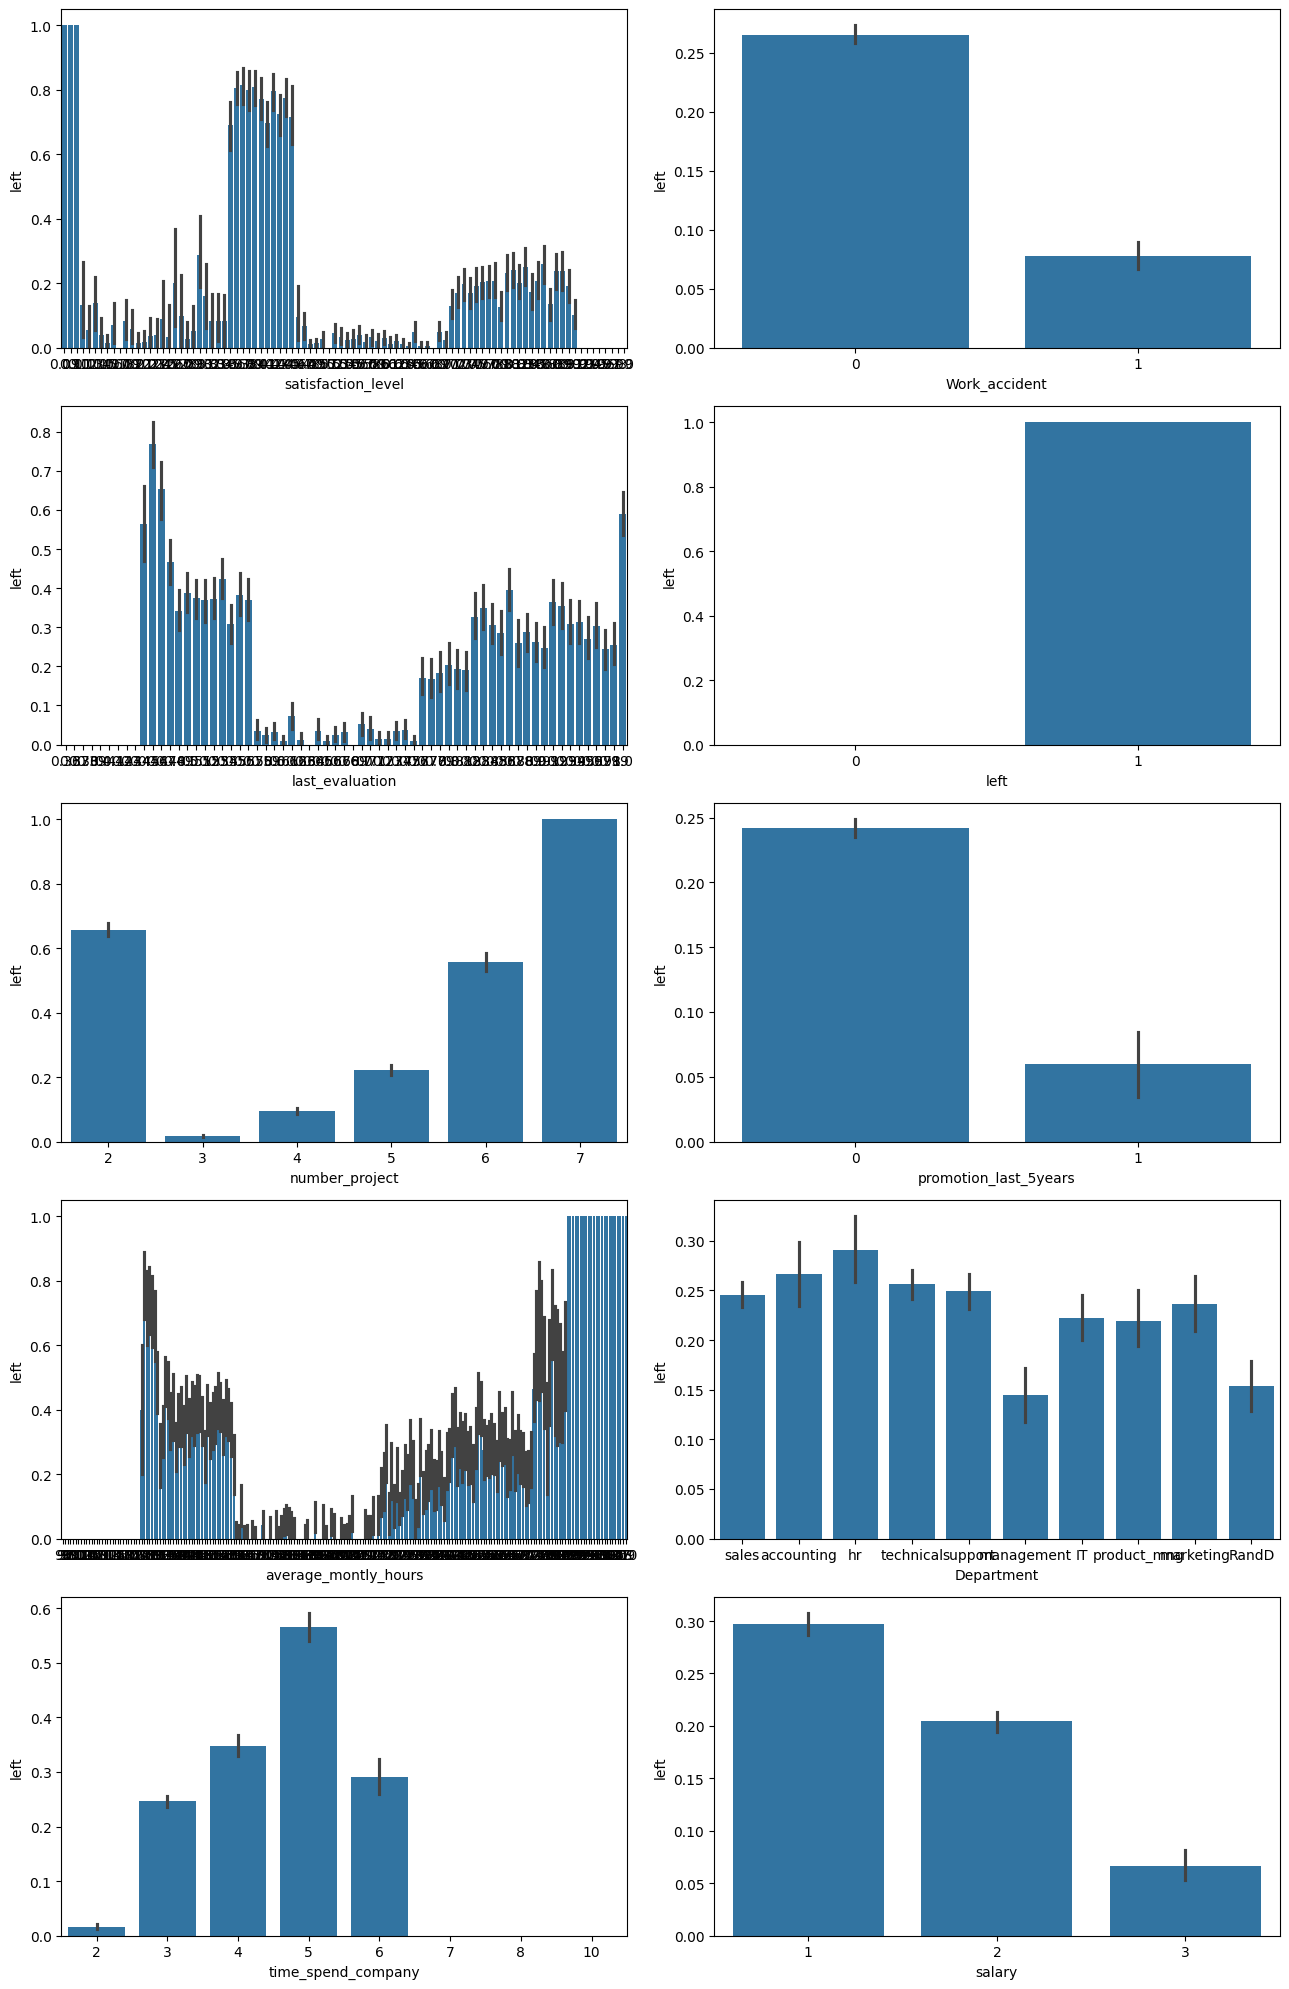

In [22]:
fig, axes = plt.subplots(ncols, nrows,figsize=(13,20))

for ax, feature in zip(axes.T.ravel(), df.columns):
    sns.barplot(data=df, x = feature, y =df['left'], ax=ax )
    ax.set_xlabel(f"{feature}")
    ax.set_ylabel(f"left")

plt.tight_layout()
plt.show()

In [112]:
dataframes = {}
by_col_name = []
for col in df.columns:
    if col != 'left':
        by_col_name = "df_by" + col
        dataframes[by_col_name] = df[[col,'left']].groupby([col,'left']).size().reset_index(name='left_count')
        print(by_col_name)
        # print(dataframes[by_col_name])


df_bysatisfaction_level
df_bylast_evaluation
df_bynumber_project
df_byaverage_montly_hours
df_bytime_spend_company
df_byWork_accident
df_bypromotion_last_5years
df_byDepartment
df_bysalary


In [115]:
dataframes['df_bysatisfaction_level'].head()

,satisfaction_level,left,left_count
0,0.09,1,195
1,0.10,1,358
2,0.11,1,335
3,0.12,0,26
4,0.12,1,4


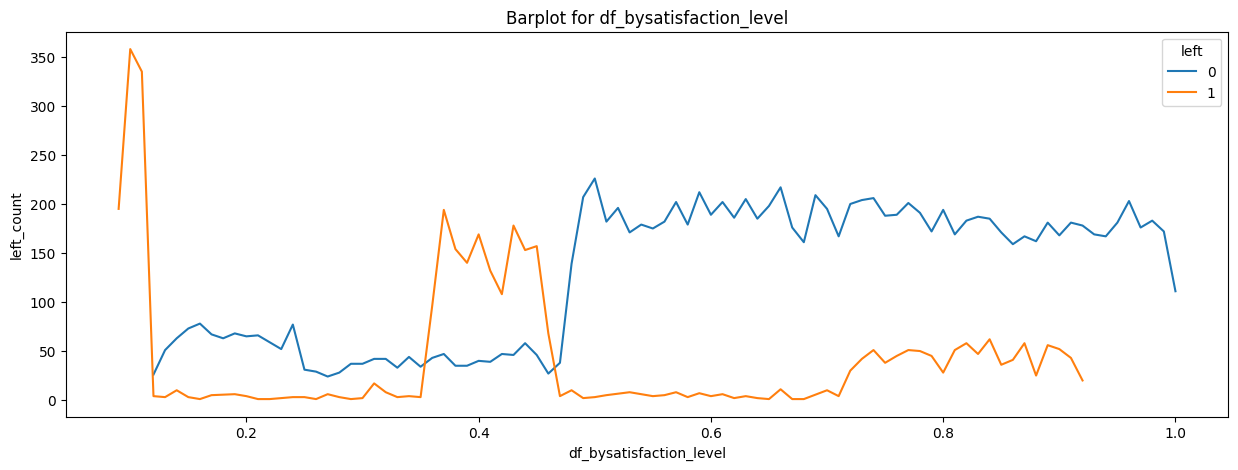

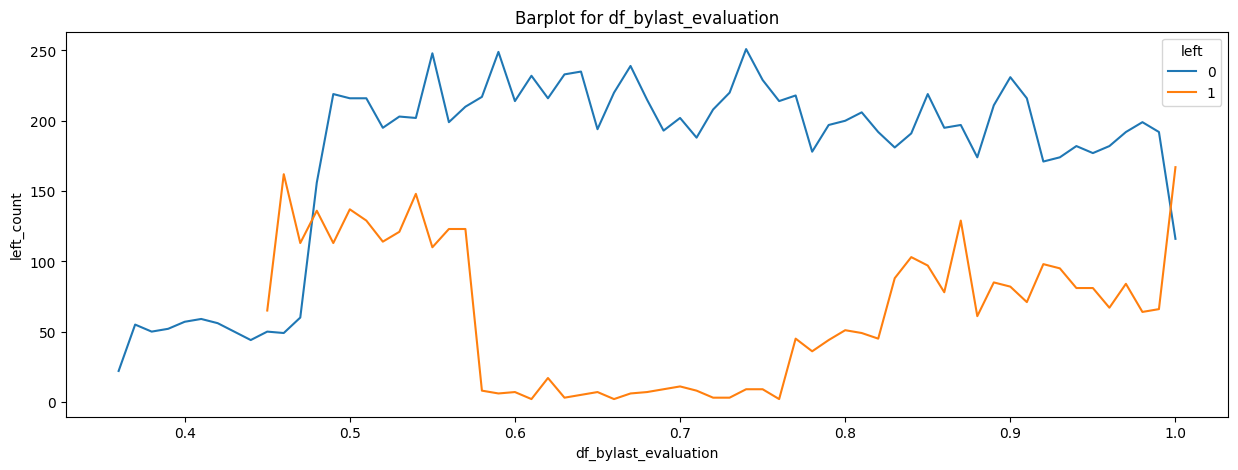

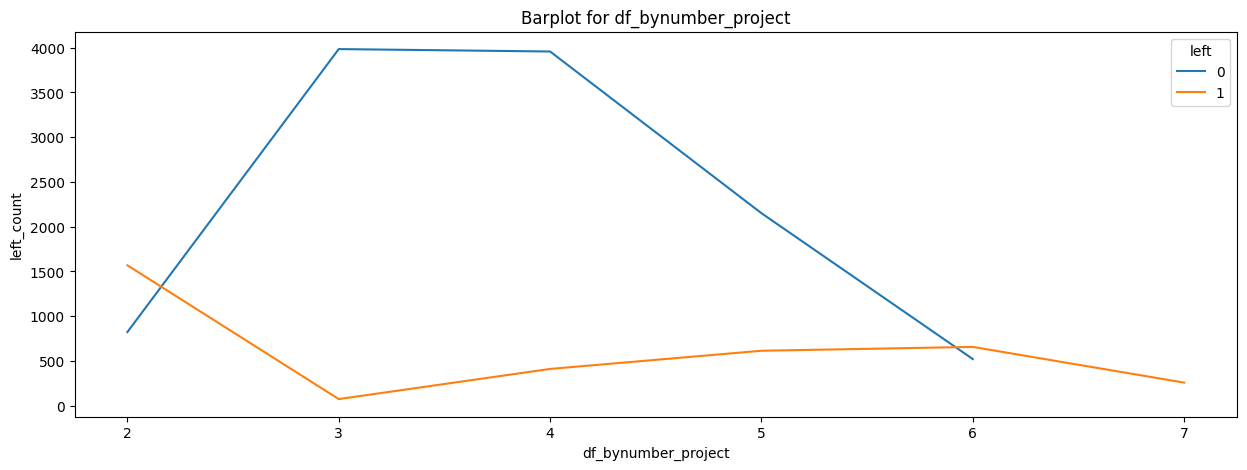

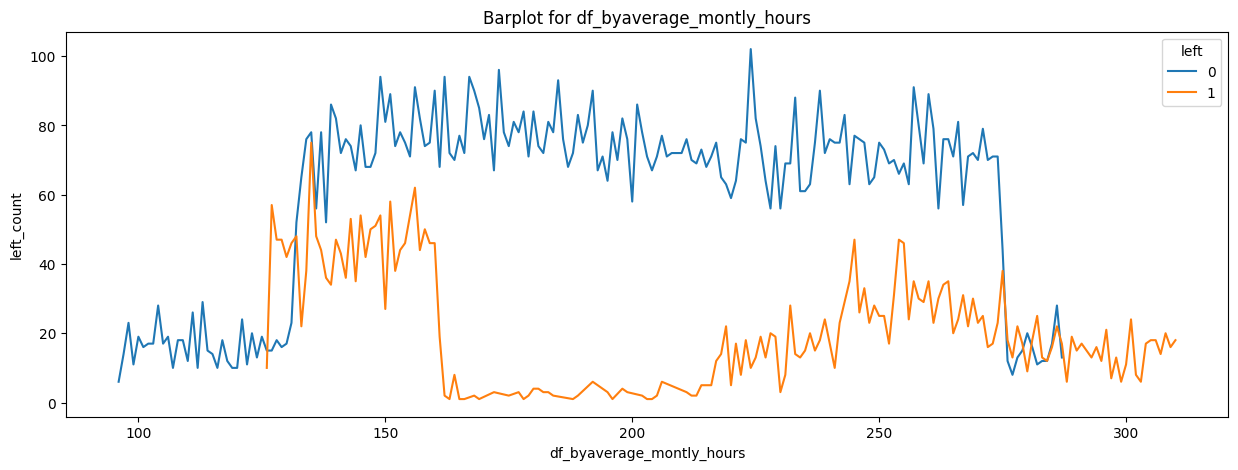

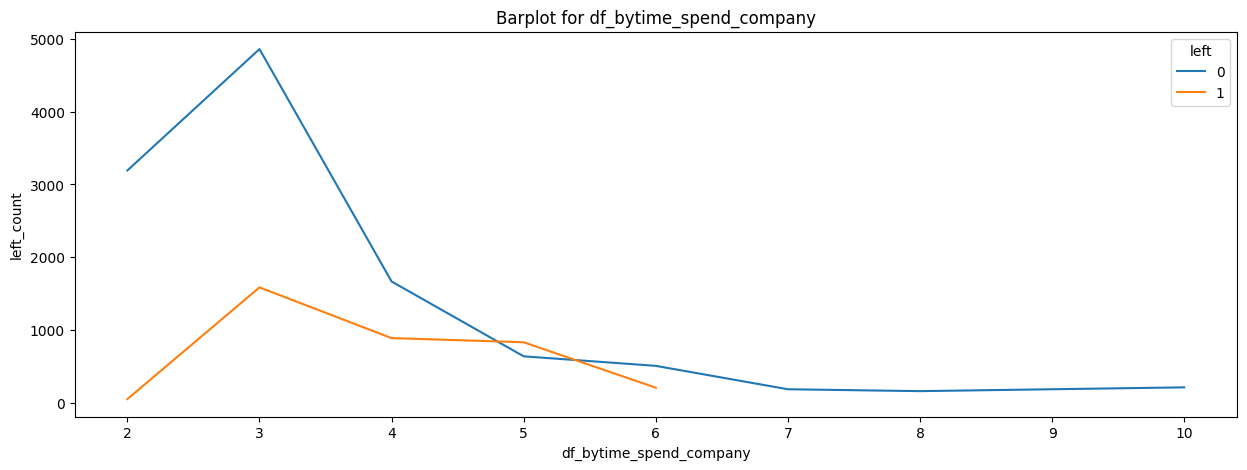

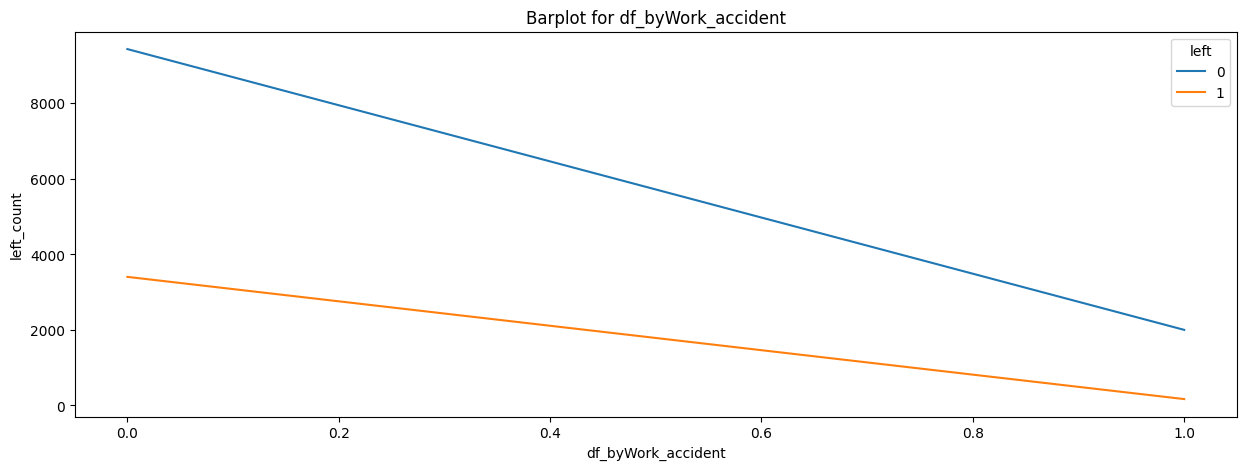

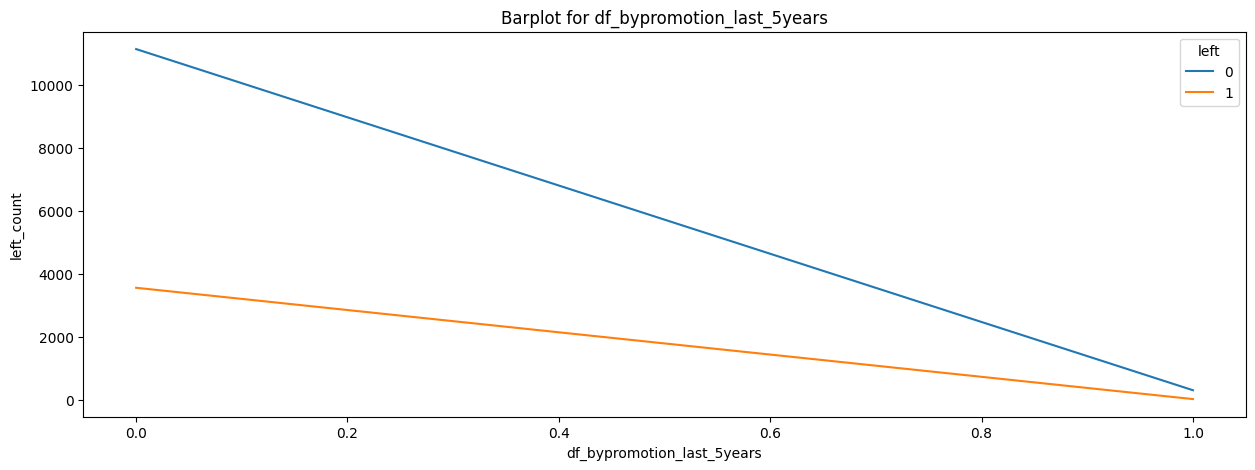

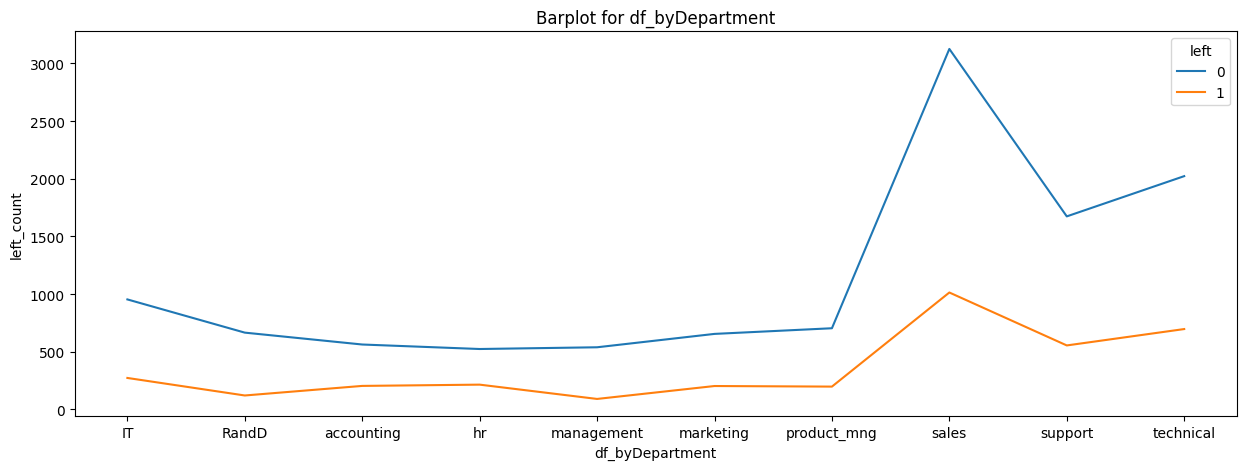

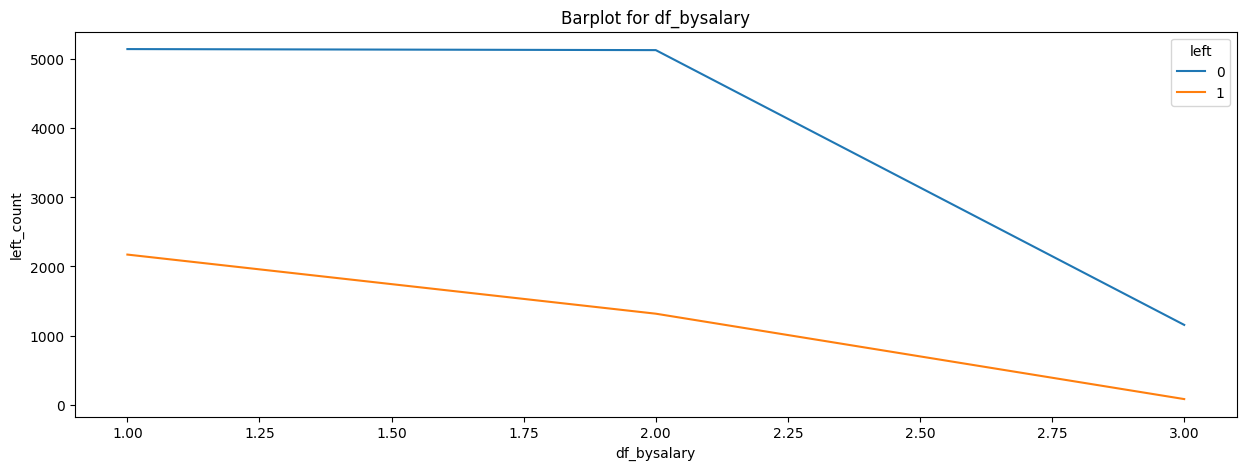

In [122]:
# Plotting each DataFrame
for df_name, df in dataframes.items():
    plt.figure(figsize=(15, 5))  # Set figure size
    sns.lineplot(x=df.columns[0], y='left_count', hue='left', data=df)
    plt.title(f'Barplot for {df_name}')
    plt.xlabel(f'{df_name}')
    plt.ylabel('left_count')
    plt.show()

# Salary and Retention

Plot bar charts showing impact of employee salaries on retention\

In [80]:
df[['salary','left']]

,salary,left
0,1,1
1,2,1
2,2,1
3,1,1
4,1,1
...,...,...
14994,1,1
14995,1,1
14996,1,1
14997,1,1


In [86]:
by_salary = df[['salary','left']].groupby(['salary','left']).size().reset_index(name='left_count')
by_salary

# pd.DataFrame(a, columns=['salary','left','left_count'])


# df[['salary','left']].groupby(by=['salary','left'])['left'].agg('sum').reset_index()

,salary,left,left_count
0,1,0,5144
1,1,1,2172
2,2,0,5129
3,2,1,1317
4,3,0,1155
5,3,1,82


<Axes: xlabel='salary', ylabel='left_count'>

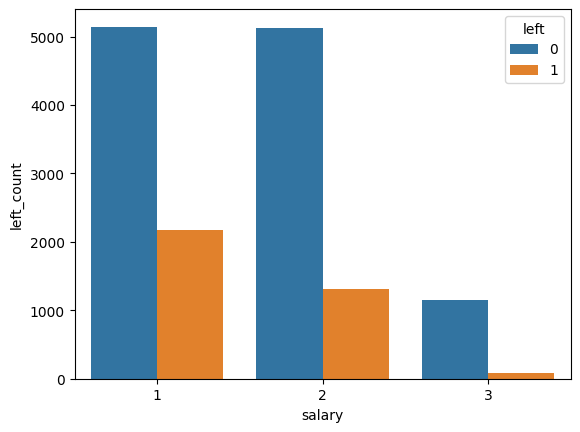

In [87]:
sns.barplot(data=by_salary, x='salary', y='left_count', hue ='left' )

# department and employee retention

Plot bar charts showing corelation between department and employee retention

In [89]:
by_dept = df[['Department','left']].groupby(['Department','left']).size().reset_index(name='left_count')
by_dept

,Department,left,left_count
0,IT,0,954
1,IT,1,273
2,RandD,0,666
3,RandD,1,121
4,accounting,0,563
5,accounting,1,204
6,hr,0,524
7,hr,1,215
8,management,0,539
9,management,1,91


<Axes: xlabel='Department', ylabel='left_count'>

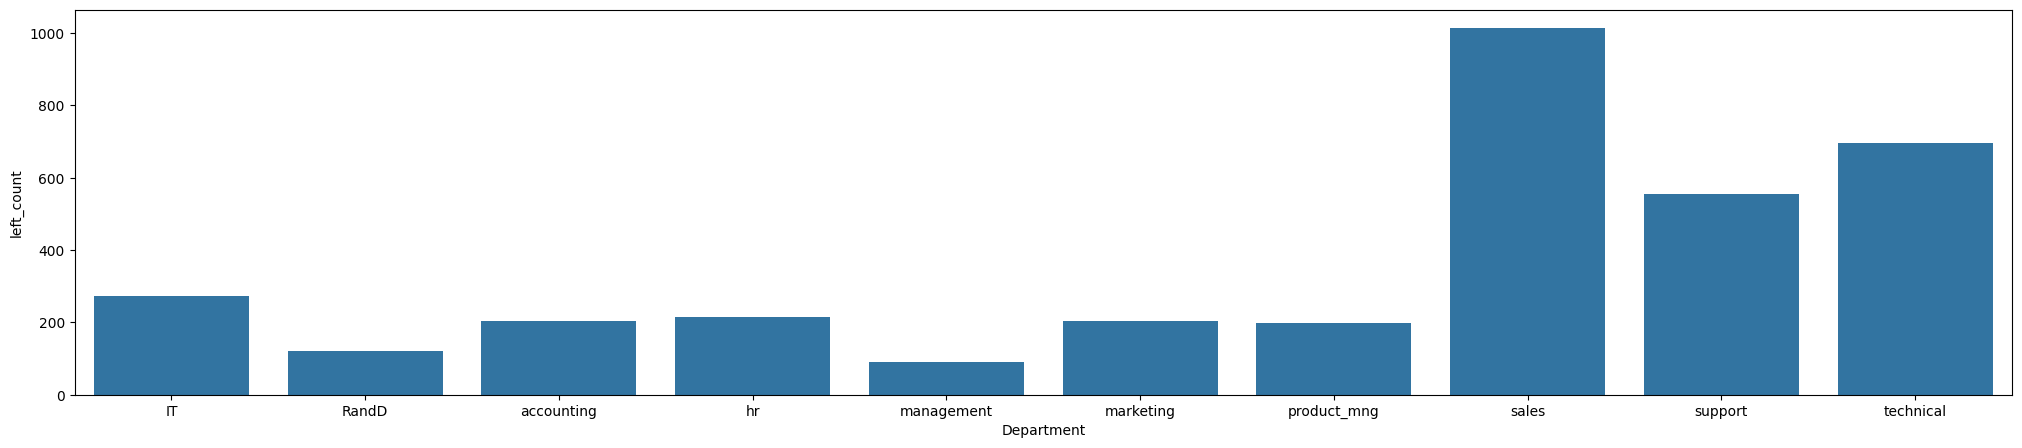

In [97]:
plt.figure(figsize=(25, 5))
by_dept_left = by_dept[(by_dept['left']==1)]
sns.barplot(data=by_dept_left, x='Department', y = 'left_count')

<Axes: xlabel='Department', ylabel='left_count'>

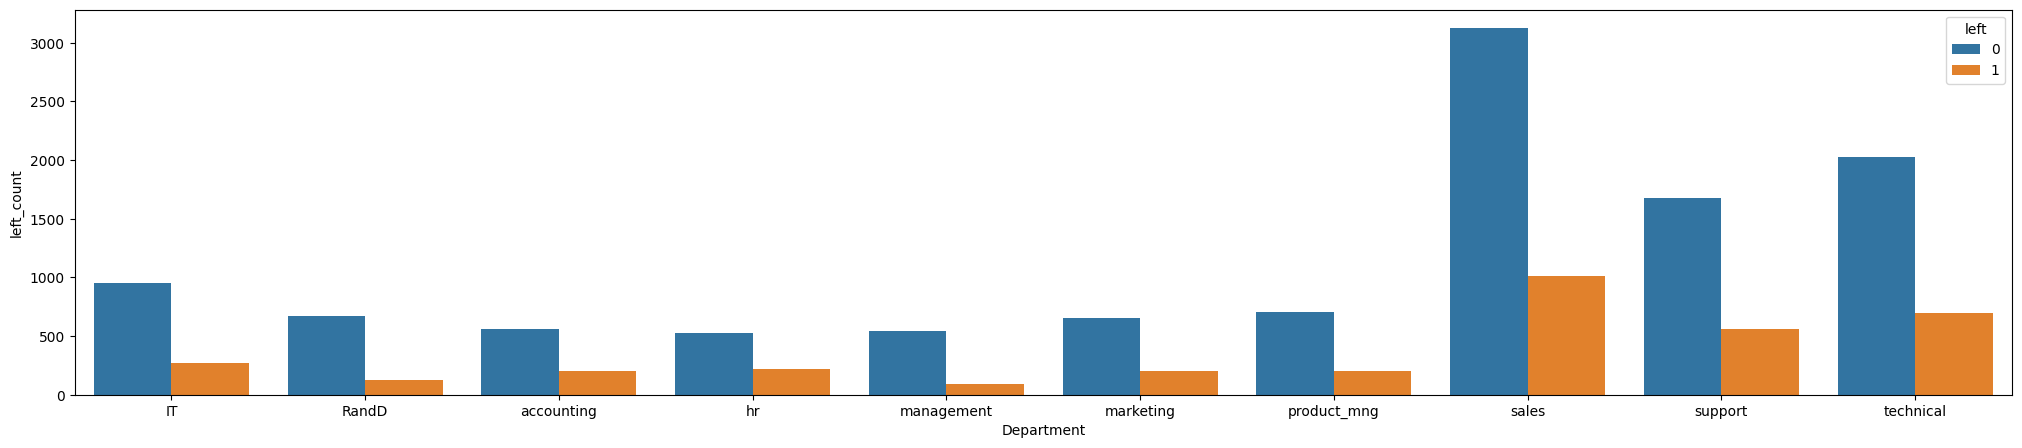

In [96]:
plt.figure(figsize=(25, 5))
sns.barplot(data=by_dept, x='Department', y = 'left_count', hue ='left')

In [25]:
# dummy department
department_dummy = pd.get_dummies(df['Department'],  dtype=int)

df_concat = pd.concat([df, department_dummy], axis = 1)
df_concat.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,sales,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,2,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,2,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,1,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,support,1,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,support,1,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,support,1,0,0,0,0,0,0,0,0,1,0


In [47]:
df_a = df_concat.drop(['Department', 'IT', 'number_project'], axis = 'columns')
df_a.head()

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,157,3,0,1,0,1,0,0,0,0,0,0,1,0,0
1,0.80,0.86,262,6,0,1,0,2,0,0,0,0,0,0,1,0,0
2,0.11,0.88,272,4,0,1,0,2,0,0,0,0,0,0,1,0,0
3,0.72,0.87,223,5,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0.37,0.52,159,3,0,1,0,1,0,0,0,0,0,0,1,0,0


# Logistic Regression build

Now build logistic regression model using variables that were narrowed down in step 1\
Measure the accuracy of the model

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [42]:
df_a.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'left', 'salary', 'RandD',
       'accounting', 'hr', 'management', 'marketing', 'product_mng', 'sales',
       'support', 'technical'],
      dtype='object')

In [59]:
X = df.drop(['left','Department'], axis=1)
y = df.left

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)
X_train

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary
14138,0.58,0.76,4,197,5,0,0,1
3698,0.42,0.86,2,108,5,0,0,3
7009,0.69,0.94,3,170,3,0,0,3
1541,0.61,0.46,5,220,4,0,0,1
10328,0.65,0.72,3,248,4,0,0,2
...,...,...,...,...,...,...,...,...
4150,0.77,0.76,2,216,3,1,0,2
6349,0.34,0.81,4,116,3,1,0,1
5994,0.80,0.99,4,255,5,1,0,1
3631,0.39,0.48,3,190,2,0,0,1


In [65]:
reg = LogisticRegression(solver='liblinear', penalty='l2')

In [75]:
reg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [86]:
y_pred = reg.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [78]:
reg.score(X_test, y_test)

0.797

In [82]:
predict_prob = reg.predict_proba(X_test)
predict_prob

array([[0.99268408, 0.00731592],
       [0.93102352, 0.06897648],
       [0.45462572, 0.54537428],
       ...,
       [0.73689645, 0.26310355],
       [0.84081549, 0.15918451],
       [0.96271049, 0.03728951]])

In [83]:
predict_prob_df = pd.DataFrame(predict_prob, columns=['probability_class_0', 'probability_class_1'])

In [80]:
X_test

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary
8765,0.92,0.51,4,167,3,1,0,2
5739,0.91,0.87,3,199,3,0,0,2
14875,0.36,0.49,2,147,3,0,0,1
9725,0.70,0.83,3,189,3,0,0,1
3438,0.74,0.70,4,167,3,1,0,1
...,...,...,...,...,...,...,...,...
12084,0.11,0.77,6,291,4,0,0,1
1176,0.38,0.50,2,151,3,1,0,1
14418,0.78,0.87,4,228,5,0,0,1
8969,0.58,0.60,4,222,3,0,0,2


In [87]:
df_X_test_with_prob = pd.concat([X_test.reset_index(drop=True), predict_prob_df], axis=1)
df_X_test_with_prob['Predicted_label'] = y_pred
df_X_test_with_prob

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,probability_class_0,probability_class_1,Predicted_label
0,0.92,0.51,4,167,3,1,0,2,0.992684,0.007316,0
1,0.91,0.87,3,199,3,0,0,2,0.931024,0.068976,0
2,0.36,0.49,2,147,3,0,0,1,0.454626,0.545374,1
3,0.70,0.83,3,189,3,0,0,1,0.748932,0.251068,0
4,0.74,0.70,4,167,3,1,0,1,0.964408,0.035592,0
...,...,...,...,...,...,...,...,...,...,...,...
2995,0.11,0.77,6,291,4,0,0,1,0.258110,0.741890,1
2996,0.38,0.50,2,151,3,1,0,1,0.799516,0.200484,0
2997,0.78,0.87,4,228,5,0,0,1,0.736896,0.263104,0
2998,0.58,0.60,4,222,3,0,0,2,0.840815,0.159185,0


# SOLUTION

In [165]:
path = 'C:/Users/84393/OneDrive - CÔNG TY TNHH OFFICIENCE/PYTHON/Logistic_Regression/'
df = pd.read_csv(path + 'HR_comma_sep.csv')

print(df.shape)
df.describe(include='all')

(14999, 10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


## EDA & Visualize

In [107]:
left = df[df.left==1]
left.shape

(3571, 10)

In [108]:
retained = df[df.left==0]
retained.shape

(11428, 10)

In [180]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Average number for all columns

In [116]:
df.drop(['Department','salary'], axis=1).groupby(by=['left']).mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [137]:
df_mean = df.drop(['Department','salary'], axis=1).groupby(by=['left']).mean().reset_index()
df_mean

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


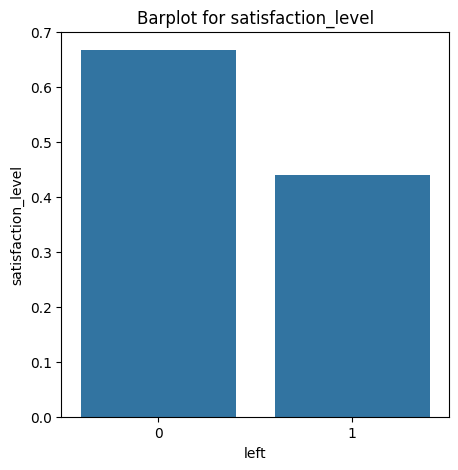

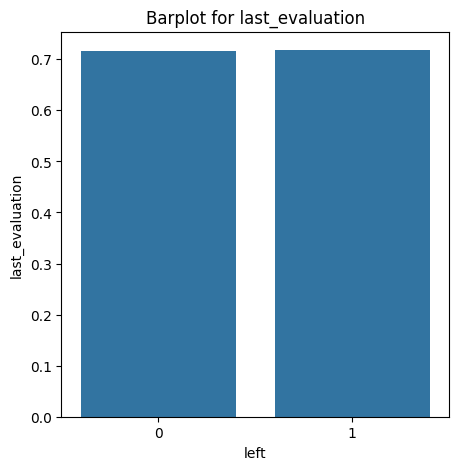

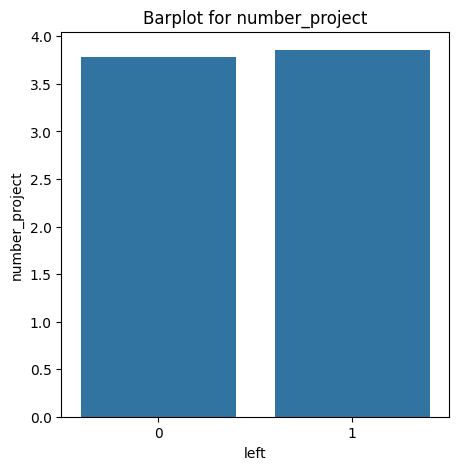

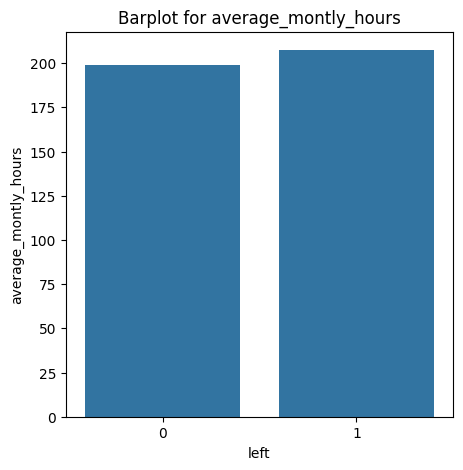

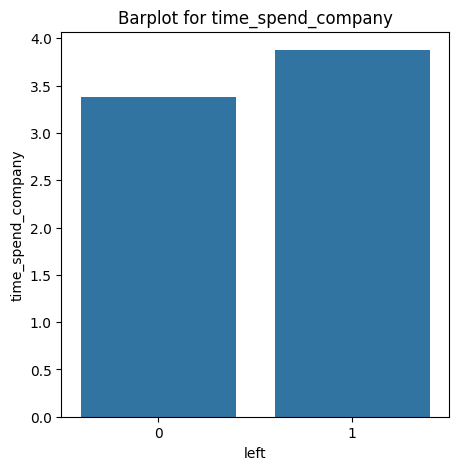

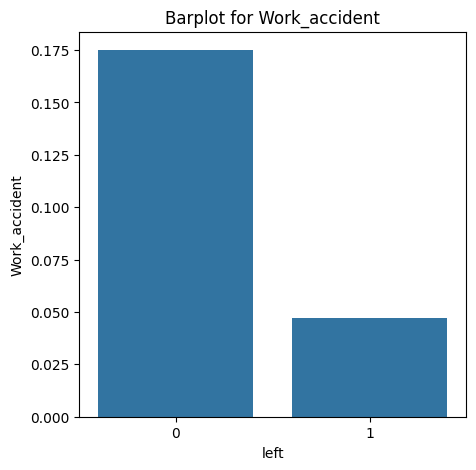

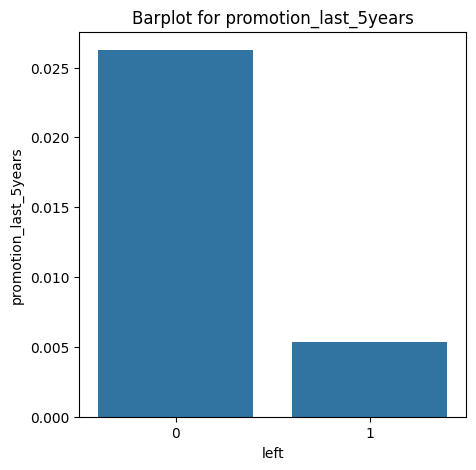

In [162]:
for col in df_mean.columns:
    if col != 'left':
        plt.figure(figsize=(5,5))
        sns.barplot(data=df_mean, x='left', y = col)
        plt.title(f"Barplot for {col}")
        plt.xlabel('left')
        plt.ylabel(f'{col}')
        plt.show

From above table we can draw following conclusions,\
\
**Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)\
**Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)\
**Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm

### Impact of salary on employee retention

<Axes: xlabel='salary'>

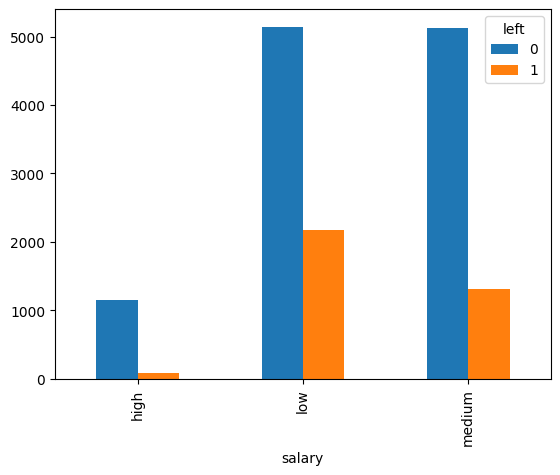

In [117]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

### Department wise employee retention rate

<Axes: xlabel='Department'>

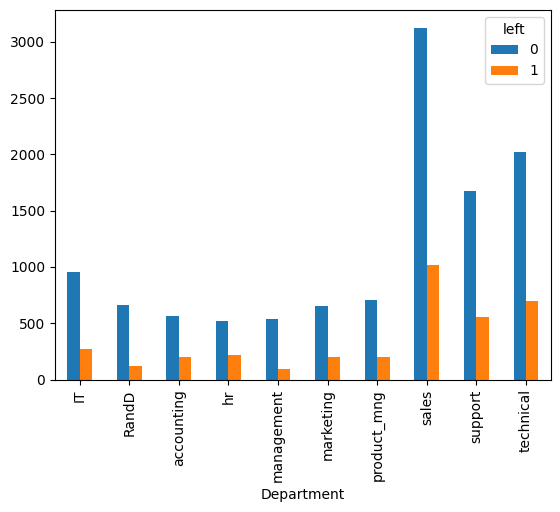

In [97]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

From above chart there seem to be some impact of department on employee retention but it is not major hence we will ignore department in our analysis

From the data analysis so far we can conclude that we will use following variables as independant variables in our model\
**Satisfaction Level**\
**Average Monthly Hours**\
**Promotion Last 5 Years**\
**Salary**\

In [181]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [189]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


### Tackle salary dummy variable

In [191]:
# Salary has all text data. It needs to be converted to numbers and we will use dummy variable for that. Check my one hot encoding tutorial to understand purpose behind dummy variables.

salary_dummies = pd.get_dummies(subdf.salary, prefix="salary", dtype=int)
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')
df_with_dummies.head()


,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [192]:
# Now we need to remove salary column which is text data. It is already replaced by dummy variables so we can safely remove it
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [193]:
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [171]:
y = df.left

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3, random_state=42)
model = LogisticRegression()


In [195]:
model.fit(X_train, y_train)

LogisticRegression()

In [136]:
print(model.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [128]:
model.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [196]:
model.score(X_test,y_test)

0.7687619047619048